<a href="https://colab.research.google.com/github/Grecia329/EcuacionesDiferencialesParciales-/blob/main/Integral_de_Fourier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTEGRAL DE FOURIER

Considere la función pulso unitario:
$$f(x)=1 \quad si \quad -1 ≤ x ≤ 1$$
0 en otro caso.

*Inciso a)*

a) Grafique esta función.

Solución:

Dónde los coeficientes son:
$$
A(w)=\frac{1}{Π}\int_{-∞}^{+∞}f(v) cos (wv)
dv=\frac{2 sen w}{Πw} \\
B(w)=\frac{1}{Π}\int_{-1}^{1}sin (wv)dv=0\\
\therefore f(x)=\frac{2}{Π}\int_{0}^{+∞}\frac{cos (wx) sen(w)}{w}dw
$$


*Solución de la Integral:*
$$
\int_{0}^{+∞}\frac{cos (wx) sen(w)}{w}dw=\begin{cases}
        \frac{Π}{2} \quad si & 0≤x<1 \\
        \frac{Π}{4} \quad si & x=1\\
        0 \quad si & x>1
    \end{cases}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Definimos la función pulso unitario
def pulso_unitario(x):
    return np.where((x >= -1) & (x <= 1), 1, 0)

In [4]:
# Valores de x para graficar
x_vals = np.linspace(-5, 5, 1000)
y_vals = pulso_unitario(x_vals)

Graficamos:

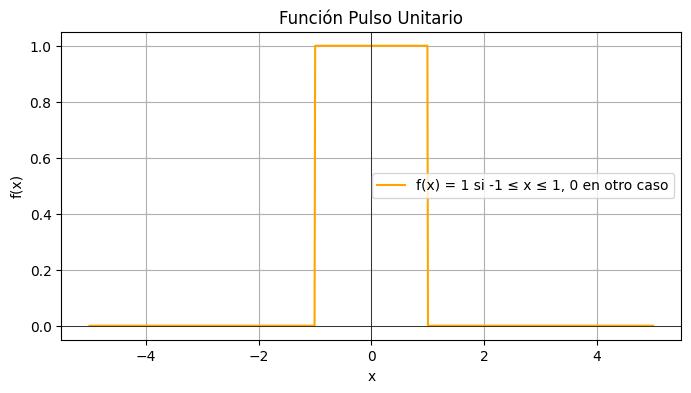

In [5]:
plt.figure(figsize=(8, 4))
plt.plot(x_vals, y_vals, label='f(x) = 1 si -1 ≤ x ≤ 1, 0 en otro caso', color='orange')
plt.title('Función Pulso Unitario')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()

*Inciso b)*

b) Calcule su representación como integral de Fourier, realizando explícitamente las integrales en forma simbólica usando sympy.
Grafique el resultado sobre la función original y compare.

Solución:

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [7]:
# Función pulso unitario
def pulso_unitario(x):
    return np.where((x >= -1) & (x <= 1), 1, 0)

In [8]:
# Transformada de Fourier de la función pulso
def fourier_transform(w):
    return np.where(w == 0, 2, 2 * np.sin(w) / w)

In [9]:
# Aproximación de la inversa de Fourier con límite a
def f_aprox(x, a):
    integrand = lambda w: fourier_transform(w) * np.exp(1j * w * x)
    result, _ = quad(lambda w: np.real(integrand(w)), -a, a)
    return result / (2 * np.pi)



In [10]:
# Valores de x
x_vals = np.linspace(-5, 5, 500)



In [11]:
# Evaluación de funciones
f_original = pulso_unitario(x_vals)
f_aprox_vals = [f_aprox(x, a=50) for x in x_vals]  # Usamos a = 50 para buena precisión

<ipython-input-8-2618715643>:3: RuntimeWarning: invalid value encountered in scalar divide
  return np.where(w == 0, 2, 2 * np.sin(w) / w)
<ipython-input-9-4062114149>:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  result, _ = quad(lambda w: np.real(integrand(w)), -a, a)


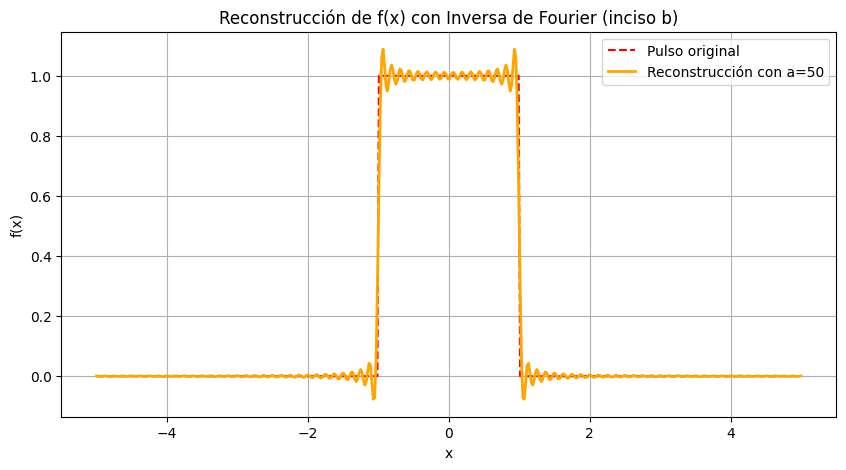

In [12]:
# Gráfica
plt.figure(figsize=(10, 5))
plt.plot(x_vals, f_original, label='Pulso original', linestyle='--', color='red')
plt.plot(x_vals, f_aprox_vals, label='Reconstrucción con a=50', linewidth=2, color='orange')
plt.title('Reconstrucción de f(x) con Inversa de Fourier (inciso b)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()
plt.show()



*Inciso c)*

c) Considere aproximaciones a la integral impropia, dando valores finitos al extremo superior de la integral: a= 8, 16 y 32 e integre simbólicamente en sympy.
Grafique sobre la función original en un panel distinto al del inciso b).

Solución:

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [14]:
# Función pulso unitario
def pulso_unitario(x):
    return np.where((x >= -1) & (x <= 1), 1, 0)


In [15]:
# Transformada de Fourier de la función pulso
def fourier_transform(w):
    return np.where(w == 0, 2, 2 * np.sin(w) / w)

In [16]:
# Aproximación de la inversa de Fourier
def f_aprox(x, a):
    integrand = lambda w: fourier_transform(w) * np.exp(1j * w * x)
    result, _ = quad(lambda w: np.real(integrand(w)), -a, a)
    return result / (2 * np.pi)

In [17]:
# Valores de x y pulso original
x_vals = np.linspace(-5, 5, 500)
f_original = pulso_unitario(x_vals)

In [18]:
# Valores de a para aproximación
a_values = [8, 16, 32]

In [19]:
# Calculamos las reconstrucciones
reconstructed_vals = {a: [f_aprox(x, a) for x in x_vals] for a in a_values}

<ipython-input-15-2618715643>:3: RuntimeWarning: invalid value encountered in scalar divide
  return np.where(w == 0, 2, 2 * np.sin(w) / w)


NOTA: En el caso de una serie de Fourier, las gráficas de las sumas parciales son curvas de aproximación de la curva de la función periódica representada por la serie.
De manera similar, en el caso de la integral de Fourier, las aproximaciones se obtienen sustituyendo $∞$ por números $a$. Por lo tanto, la integral:

$$
\int_{0}^{a}\frac{cos (wx)}{sen (w)}dw
$$
Es una aproximación de la integral del inciso a).
Lo cuál es equivalente a:
$$
\frac{1}{Π}Si(a[x+1])-\frac{1}{Π}Si(a[x-1])
$$

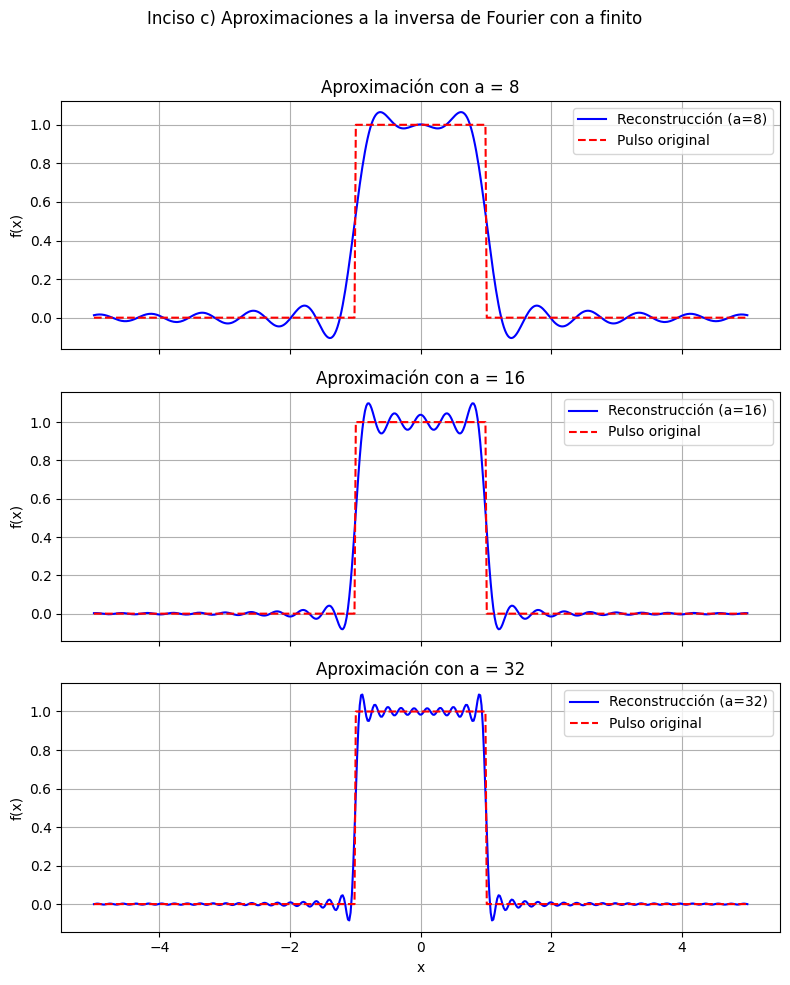

In [21]:
# Graficamos en subplots
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(8, 10), sharex=True)

for idx, a in enumerate(a_values):
    axes[idx].plot(x_vals, reconstructed_vals[a], label=f'Reconstrucción (a={a})', color='blue')
    axes[idx].plot(x_vals, f_original, label='Pulso original', linestyle='--', color='red')
    axes[idx].set_title(f'Aproximación con a = {a}')
    axes[idx].grid(True)
    axes[idx].legend()
    axes[idx].set_ylabel('f(x)')

axes[-1].set_xlabel('x')
plt.suptitle('Inciso c) Aproximaciones a la inversa de Fourier con a finito')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Para $n=∞$:

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [23]:
# Valores de z
z_vals = np.linspace(-8 * np.pi, 8 * np.pi, 1000)

In [24]:
# Definimos el integrando sinc(z)
def sinc(z):
    return np.where(z == 0, 1, np.sin(z) / z)

In [25]:
# Definimos la función Si(z) como integral definida
def si(z_array):
    return np.array([quad(lambda t: np.sin(t) / t if t != 0 else 1, 0, z)[0] for z in z_array])

In [26]:
# Evaluamos las funciones
integrando_vals = sinc(z_vals)
si_vals = si(z_vals)

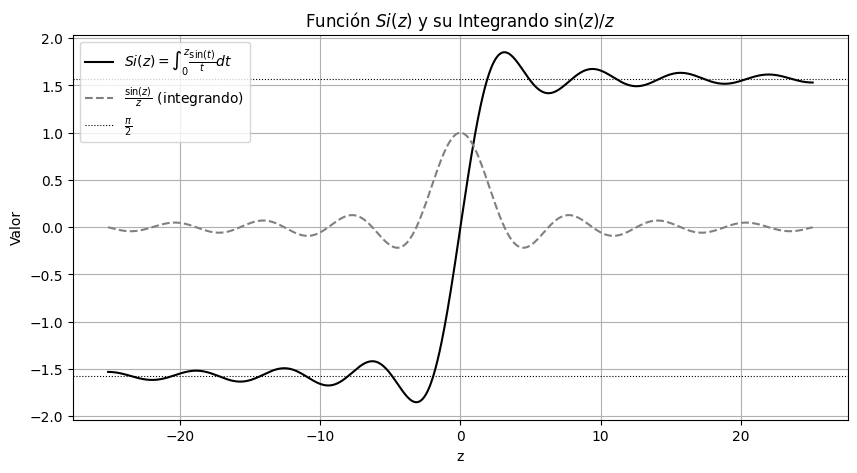

In [27]:
# Graficamos
plt.figure(figsize=(10, 5))
plt.plot(z_vals, si_vals, label=r'$Si(z) = \int_0^z \frac{\sin(t)}{t} dt$', color='black')
plt.plot(z_vals, integrando_vals, linestyle='--', label=r'$\frac{\sin(z)}{z}$ (integrando)', color='gray')
plt.axhline(np.pi / 2, color='black', linestyle=':', linewidth=0.8, label=r'$\frac{\pi}{2}$')
plt.axhline(-np.pi / 2, color='black', linestyle=':', linewidth=0.8)
plt.title('Función $Si(z)$ y su Integrando $\sin(z)/z$')
plt.xlabel('z')
plt.ylabel('Valor')
plt.grid(True)
plt.legend()
plt.show()